In [219]:
import sklearn
import tensorflow
import matplotlib.pyplot as plt
from random import *

2개의 클래스 (class)
분류(classfication)
이진 분류(binary classfication)

In [230]:

# 샘플 준비 도미 와 빙어
# 도미 샘플
bream_length = [round(random(),2)*10 + 20 + i  for i in range(1,36)]
bream_weight = [randint(50,100) + 150 + i * randint(10,15) for i in range(1,36)]

# 빙어 샘플
smelt_length = [round(random(),1) + 9 + i/2 for i in range(1,15)]
smelt_length.sort()
smelt_weight = [round(random(),1)* 10 + 9 + i for i in range(1,15)]
smelt_weight.sort()

# # scatter plot  산점도 
# plt.scatter(bream_length,bream_weight)
# plt.xlabel('length')
# plt.ylabel('weight')
# plt.show()

# 리스트 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
fish_data = [[l,w] for l,w in zip(length,weight)]

In [231]:
# 정답 준비
fish_target = [1]*35 + [0]*14

In [232]:
# k-최근접 이웃
from sklearn.neighbors import KNeighborsClassifier

# 모델
kn = KNeighborsClassifier()

kn.fit(fish_data, fish_target)

kn.score(fish_data, fish_target)



1.0

In [224]:
kn.predict([[30,600]])

array([1])

In [233]:
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data,fish_target)
kn49.score(fish_data,fish_target)

# print(35/49) 확률

0.7142857142857143

# 지도 학습 과 비지도 학습
k-최근접 이웃 => 지도학습  타겟 데이터가 를 가르치는 학습하는 알고리즘
비지도 학습 - 타겟 데이터 없이 입력 데이터 만으로 하는 알고리즘
강화 학습 - 어떤 행동을 수행 후 주변에 환경에서 결과를 피드백 받아 개선해나가는 알고리즘

In [234]:
# 훈련 세트 와 테스트 세트

train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [235]:
# 테스트 세트에서 평가하기

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn = kn.fit(train_input,train_target)

kn.score(test_input,test_target)

0.0

샘플링 편향

샘플링은 골고루 섞어서 훈련세트 와 테스트 세트를 나눠 주어야 한다.

In [236]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

index = np.arange(49)
np.random.shuffle(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]


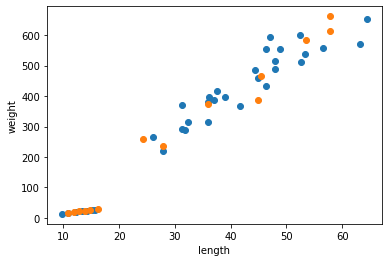

In [237]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [238]:
# 두번째 머신 러닝 프로그램

kn = kn.fit(train_input,train_target)
kn.score(test_input,test_target)
kn.predict(test_input)

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

## 데이터 전처리
넘파이로 데이터 준비

In [239]:
# stack 세로로 쌓이면서 인자가 2개면 2차 배열 
fish_data = np.column_stack((length,weight))
# concatenate 뒤로 붙여주는 함수 배열을 합쳐줌
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

# np.full((2,3),9) 2줄 3칸 배열을 9로 채워줌  

사이킷런으로 데이터 나누기

In [240]:
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target = train_test_split(fish_data,fish_target,stratify=fish_target,random_state=42)


[0.]


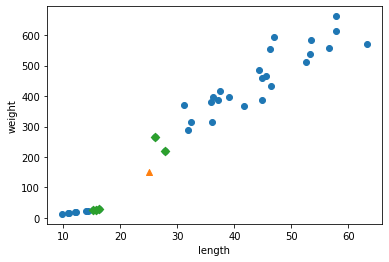

In [241]:
kn = KNeighborsClassifier()

kn.fit(train_input,train_target)
kn.score(test_input,test_target)

print(kn.predict([[25,150]]))

distances,indexes = kn.kneighbors([[25,150]])

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

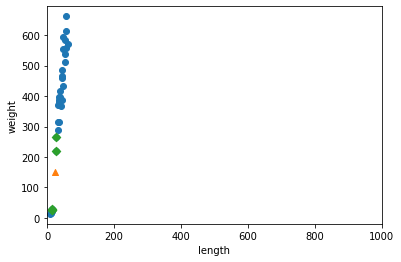

In [242]:
# 기준을 맞춰라

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')

# x,y축 조절 스케일을 맞춰 주는 것
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [244]:
# 표준 점수 로 바꾸기

# 평균 구하기  axis =1 경우 가로로 개별의 평균을 각각 구한다. 0은 세로
mean = np.mean(train_input,axis=0)
# 표준 편차 구하기
std = np.std(train_input,axis=0)
print(mean,std)

# 넘파이 배열끼리는 자동으로 브로드 캐스팅 하여 계산 해준다.
train_scaled = (train_input - mean) / std
print(train_scaled)

[ 34.94166667 326.33333333] [ 15.95567428 212.88311869]
[[ 0.06632959 -0.04853994]
 [-1.29368815 -1.42018463]
 [ 0.58652071  0.7406255 ]
 [-1.42530277 -1.43897428]
 [ 1.16311809  1.21506425]
 [-0.19689965 -0.18006751]
 [ 1.43888205  1.35598665]
 [ 1.35740633  1.08353668]
 [ 0.06006223  0.25679193]
 [ 0.7557395   1.25264356]
 [ 1.15058336  0.98958841]
 [-1.43157013 -1.43897428]
 [ 0.66172906  0.66076948]
 [-1.3187576  -1.42018463]
 [-0.55413933 -0.2834106 ]
 [ 0.62412488  0.280279  ]
 [ 0.25435048  0.32725313]
 [ 1.43261469  1.57676508]
 [ 0.62412488  0.62788758]
 [-1.20594507 -1.40609239]
 [ 0.07886432  0.32725313]
 [-0.4413268  -0.4947942 ]
 [-1.57571947 -1.47185618]
 [ 0.16034003  0.41650398]
 [-1.51304584 -1.46246135]
 [ 0.71813533  0.50105742]
 [-1.50677848 -1.45776394]
 [ 1.10671182  0.87215308]
 [ 0.42356927  0.18633073]
 [ 0.71186796  1.07883926]
 [-1.24354924 -1.41548722]
 [-0.23450383  0.2098178 ]
 [ 0.13527058  0.280279  ]
 [-1.17460825 -1.39669756]
 [-0.16556283 -0.05793476]

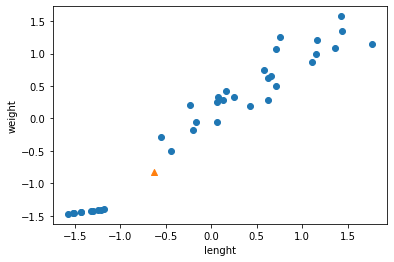

In [245]:
#  수상한 도미 다시 표시하기

new = ([25,150] - mean) / std

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')

plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

[1.]


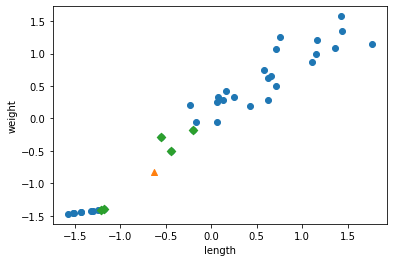

In [246]:
# 전처리 데이터 에서 모델 훈련

kn.fit(train_scaled,train_target)
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

print(kn.predict([new]))

distances,indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()